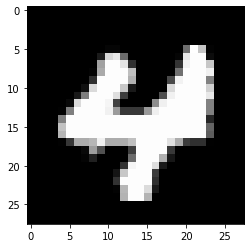

In [5]:
import numpy as np
import matplotlib.pyplot as plt

train_images = np.loadtxt('lab2data/train_images.txt')
train_labels = np.loadtxt('lab2data/train_labels.txt').astype(int)
test_images = np.loadtxt('lab2data/test_images.txt')
test_labels = np.loadtxt('lab2data/test_labels.txt').astype(int)

image = train_images[0, :]
image = np.reshape(image, (28, 28))

plt.imshow(image.astype(np.uint8), cmap='gray')
plt.show()

In [6]:
def values_to_bins(X, num_bins):
    bins = np.linspace(start=0, stop=255, num=num_bins)
    return np.digitize(X, bins) 

values_to_bins(train_images, 5).mean()

1.3956326530612244

In [7]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

X_train = values_to_bins(train_images, 5)
X_test = values_to_bins(test_images, 5)

clf.fit(X_train, train_labels)

clf.score(X_test, test_labels)

0.806

In [8]:
for num_bins in [1, 4, 6, 8, 10, 16]:
    clf = MultinomialNB()

    X_train = values_to_bins(train_images, num_bins)
    X_test = values_to_bins(test_images, num_bins)

    clf.fit(X_train, train_labels)

    accuracy = clf.score(X_test, test_labels)
    
    print(num_bins, accuracy)

1 0.104
4 0.806
6 0.806
8 0.81
10 0.81
16 0.818


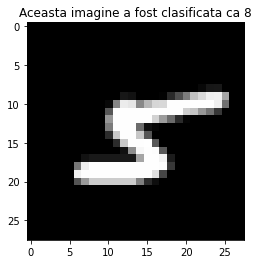

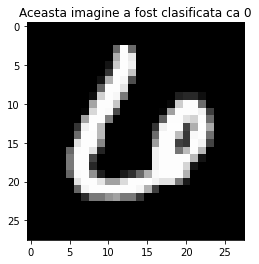

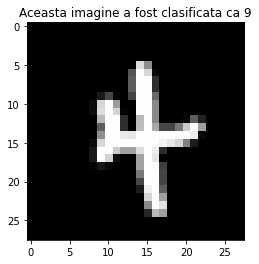

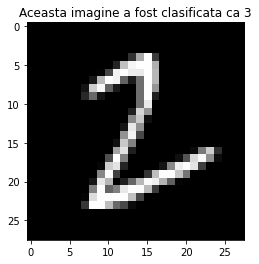

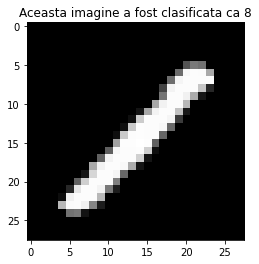

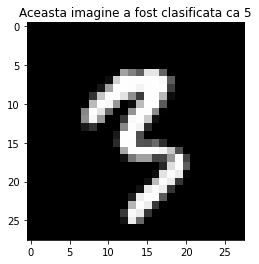

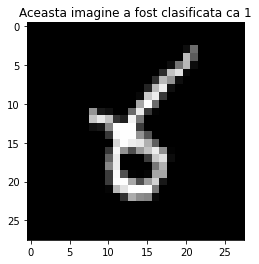

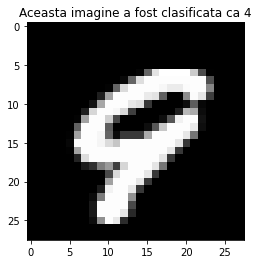

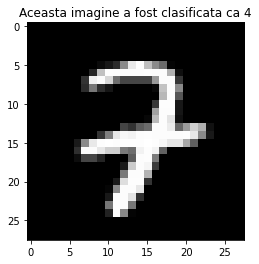

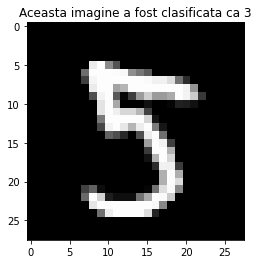

In [9]:

clf = MultinomialNB()

X_train = values_to_bins(train_images, 11)
X_test = values_to_bins(test_images, 11)

clf.fit(X_train, train_labels)
pred_labels = clf.predict(X_test)

wrongs = np.argwhere(pred_labels != test_labels)
for index in wrongs[:10]:
    image = test_images[index, :]
    image = np.reshape(image, (28, 28))

    plt.title("Aceasta imagine a fost clasificata ca " + str(pred_labels[index][0]))
    plt.imshow(image.astype(np.uint8), cmap='gray')
    plt.show()

In [10]:
def confusion_matrix(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    
    return [[np.sum((y_true == row) & (y_pred == column))
             for column in range(num_classes)
             ] for row in range(num_classes)]

confusion_matrix(test_labels, pred_labels)

[[49, 0, 0, 0, 0, 0, 3, 0, 1, 0],
 [0, 49, 0, 0, 0, 0, 0, 0, 3, 0],
 [2, 4, 43, 2, 2, 0, 3, 1, 1, 0],
 [0, 0, 1, 49, 0, 1, 0, 0, 0, 2],
 [0, 0, 0, 0, 36, 0, 0, 0, 1, 9],
 [1, 1, 2, 9, 0, 32, 0, 0, 5, 2],
 [2, 3, 0, 0, 1, 0, 41, 0, 1, 0],
 [1, 2, 0, 0, 1, 0, 0, 41, 0, 5],
 [0, 1, 2, 4, 0, 2, 1, 1, 34, 1],
 [0, 0, 0, 1, 7, 0, 0, 0, 1, 33]]